In [18]:
import numpy as np
import matplotlib.pyplot as plt

from py_wake.site._site import UniformSite
from py_wake.site.shear import PowerShear

from py_wake.examples.data.hornsrev1 import V80

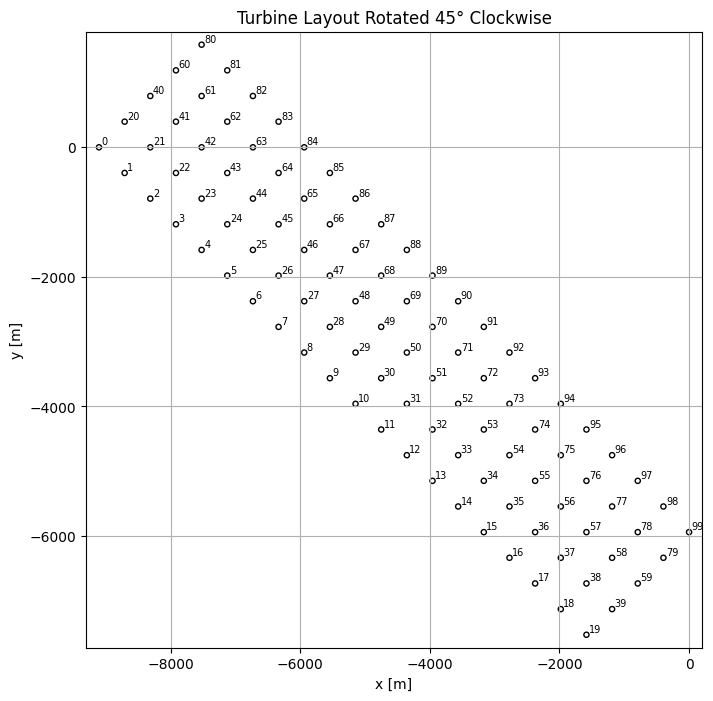

In [21]:
site = UniformSite(shear=PowerShear(h_ref=100, alpha=.1))

turbine = V80()

D = turbine.diameter()  # [m]
s = 7 * D  # [m]

n_rows = 5
n_cols = 20

x_grid, y_grid = np.meshgrid(np.arange(n_cols) * s,
                             np.arange(n_rows) * s)

x = x_grid.ravel()
y = y_grid.ravel()

theta_deg = 45
theta_rad = -np.radians(theta_deg)

rotation_matrix = np.array([
    [np.cos(theta_rad), -np.sin(theta_rad)],
    [np.sin(theta_rad),  np.cos(theta_rad)]
])

xy_rotated = rotation_matrix @ np.vstack([x, y])
x_rot, y_rot = xy_rotated[0], xy_rotated[1]

''' HVIS JEG VIL ROTERE OMKRING NEDERSTE HØJRE HJØRNE, I STEDET FOR NEDERSTE VENSTRE
# 3. Get the position of the bottom-right turbine (last turbine in the grid)
x_bottom_right = x[-1]
y_bottom_right = y[-1]

# 4. Shift layout so that the bottom-right turbine is at (0, 0)
x_shifted = x - x_bottom_right
y_shifted = y - y_bottom_right
'''

x_shifted = x_rot - np.max(x_rot)
y_shifted = y_rot

padding = 200 # [m]

fig, ax = plt.subplots(figsize=(8, 8))
turbine.plot(x_shifted, y_shifted, ax=ax)
ax.set_xlim(min(x_shifted) - padding, max(x_shifted) + padding)
ax.set_ylim(min(y_shifted) - padding, max(y_shifted) + padding)
ax.set_title(f"Turbine Layout Rotated {theta_deg}° Clockwise")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_aspect('equal')
ax.grid(True)
plt.show()